In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

df = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro_vv.csv')

df

,vv_x,vv_y,vv_z
0,0.000000,3.074505,0.053666
1,-1.142984,2.852848,0.048528
2,-2.127756,2.228986,0.039518
3,-2.813645,1.287415,0.027234
4,-3.098444,0.161675,0.012698
...,...,...,...
995,-0.876644,2.199413,1.750026
996,-1.692745,1.562118,1.820311
997,-2.312211,0.726117,1.664753
998,-2.661184,-0.221639,1.293445


Now we want to predict X values (can change for Y, Z):

In [2]:
#Create a new dataframe with only the x column
data = df.filter(['vv_x']) # CHANGE FOR Y,Z

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.8 )) # percentage of train-test data, we need to decrease

training_data_len

800

In [3]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.50642219],
       [0.32405106],
       [0.16692372],
       [0.05748543],
       [0.01204375],
       [0.0373734 ],
       [0.1285896 ],
       [0.27025402],
       [0.44059861],
       [0.61644663],
       [0.7764203 ],
       [0.90194669],
       [0.977321  ],
       [0.99062129],
       [0.93651854],
       [0.8198945 ],
       [0.65708569],
       [0.4726714 ],
       [0.29377395],
       [0.14540051],
       [0.04782723],
       [0.01468196],
       [0.05072453],
       [0.15014481],
       [0.29719316],
       [0.46975901],
       [0.6442153 ],
       [0.79906524],
       [0.91633487],
       [0.98159522],
       [0.98440316],
       [0.92057876],
       [0.79583451],
       [0.62762999],
       [0.44209302],
       [0.26733969],
       [0.1277762 ],
       [0.04154611],
       [0.0196679 ],
       [0.06499953],
       [0.17103246],
       [0.32206907],
       [0.49599026],
       [0.6688169 ],
       [0.81876602],
       [0.92820764],
       [0.98384724],
       [0.976

In [58]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.50642219, 0.32405106, 0.16692372, 0.05748543, 0.01204375,
       0.0373734 , 0.1285896 , 0.27025402, 0.44059861, 0.61644663,
       0.7764203 , 0.90194669, 0.977321  , 0.99062129, 0.93651854,
       0.8198945 , 0.65708569, 0.4726714 , 0.29377395, 0.14540051,
       0.04782723, 0.01468196, 0.05072453, 0.15014481, 0.29719316,
       0.46975901, 0.6442153 , 0.79906524, 0.91633487, 0.98159522,
       0.98440316, 0.92057876, 0.79583451, 0.62762999, 0.44209302,
       0.26733969, 0.1277762 , 0.04154611, 0.0196679 , 0.06499953,
       0.17103246, 0.32206907, 0.49599026, 0.6688169 , 0.81876602,
       0.92820764, 0.98384724, 0.97680836, 0.90427495, 0.77280777,
       0.60060756, 0.41486564, 0.24448054, 0.11332818, 0.03760147,
       0.02587418, 0.07921616, 0.19055982, 0.34452118, 0.5192794 ])]
[0.6906130793992513]

[array([0.50642219, 0.32405106, 0.16692372, 0.05748543, 0.01204375,
       0.0373734 , 0.1285896 , 0.27025402, 0.44059861, 0.61644663,
       0.7764203 , 0.90194669, 0.977

In [59]:
x_train.shape

(740, 60, 1)

Model 1:

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
# Note: replace LSTM with GRU or RNN if you want to try those
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/40
47/47 [==============================] - 2s 42ms/step - loss: 0.1227
Epoch 2/40
47/47 [==============================] - 2s 38ms/step - loss: 0.0045
Epoch 3/40
47/47 [==============================] - 2s 38ms/step - loss: 3.2196e-04
Epoch 4/40
47/47 [==============================] - 2s 38ms/step - loss: 3.2736e-04
Epoch 5/40
47/47 [==============================] - 2s 40ms/step - loss: 3.0263e-04
Epoch 6/40
47/47 [==============================] - 2s 38ms/step - loss: 3.0592e-04:
Epoch 7/40
47/47 [==============================] - 2s 38ms/step - loss: 3.3297e-04
Epoch 8/40
47/47 [==============================] - 2s 38ms/step - loss: 3.0365e-04
Epoch 9/40
47/47 [==============================] - 2s 39ms/step - loss: 3.0041e-04
Epoch 10/40
47/47 [==============================] - 2s 38ms/step - loss: 2.5180e-04
Epoch 11/40
47/47 [==============================] - 2s 38ms/step - loss: 2.6343e-04
Epoch 12/40
47/47 [==============================] - 2s 38ms/step - loss: 3.7862e

Model 2:

In [61]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.1041557776657399

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


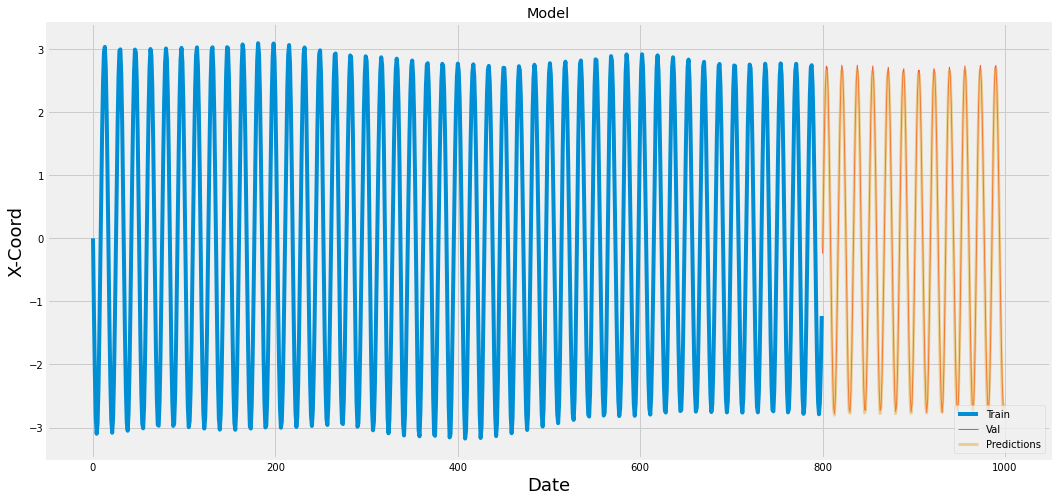

In [62]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('X-Coord', fontsize=18)
plt.plot(train['vv_x'])
plt.plot(valid['vv_x'],linewidth=1)
plt.plot(valid['Predictions'], linewidth=3, alpha=0.5)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Errors:

In [63]:
valid['Error']=abs(valid.Predictions-valid.vv_x)/6738 # the normalization ct is taken as ISS semi-major axis

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

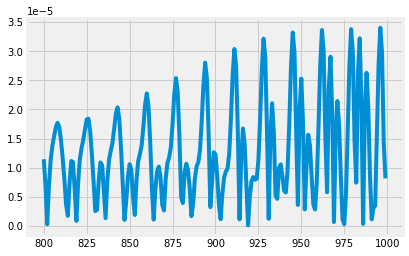

In [64]:
valid.Error.plot()